In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

创建属于4个不同簇（centers=4）的总共300个团块（n_samples=300）：

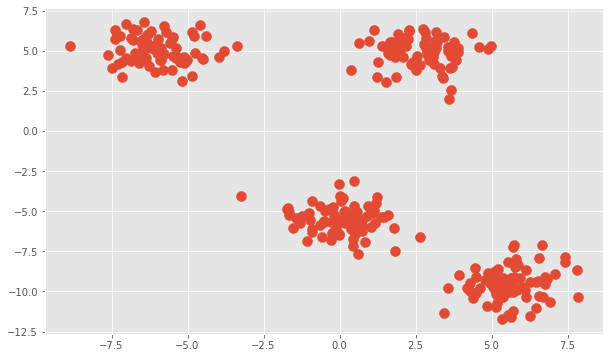

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=1.0, random_state=10)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100);

将300个无标签的点组织成4个不同的簇。即使不给数据分配目标标签，肉眼也可以很容易看到4个簇。k-均值算法在没有任何目标标签信息或者底层数据分布信息的情况下，也可以实现这种聚类。

虽然k-均值是一种统计模型，但是在OpenCV中它并不是通过ml模块以及常用的train和predict API调用来实现的。它可以直接作为cv2.kmeans使用。要使用这个模型，我们必须指定一些参数，比如终止条件和初始化标志。在这里，我们会告诉算法只要误差小于1.0（cv2.TERM_CRITERIA_EPS）或者执行了10次迭代后（cv2.TERM_CRITERIA_MAX_ITER）就终止：

In [3]:
import cv2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
            10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

把之前的数据矩阵（X）传递给cv2.means。我们还指定了聚类数（4）以及算法对不同随机初始猜测的尝试次数（10），代码片段如下所示：

In [4]:
import numpy as np
compactness, labels, centers = cv2.kmeans(X.astype(np.float32), 4,
                                          None, criteria, 10, flags)

第一个是变量compactness，返回每个点到对应聚类中心的距离平方和。高紧密性得分表示所有的点都离聚类中心近，而低紧密性得分则表示没有很好地分离不同的聚类：

In [5]:
compactness

526.6774351084605

这个数很大程度上依赖于X中的实际值。如果点之间的距离太远，首先，我们不期望一个任意小的紧密性得分。因此，绘制数据点并为这些数据点分配的聚类标签着色，这样可以提供更多的信息：

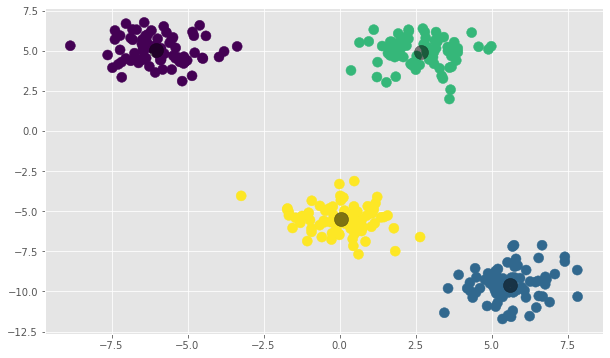

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels.reshape(1,-1)[0], s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

k-均值采用的典型方式是使用一个迭代算法，也被称为最大期望（expectation-maximization）。

k-均值聚类只是最大期望算法的一个具体应用。简而言之，这个算法的工作原理如下所示：
- 1）从一些随机聚类中心开始。
- 2）重复，直到收敛：